# Grouping Customers of a Retail Store (K-Means Clustering)




Import the dependencies

In [149]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

Data Collection and Data Pre-Processing

In [150]:
#loading the pandas Dataframe
store_data=pd.read_csv("/content/Mall_Customers.csv")

In [151]:
#Displaying the first 5 rows
store_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [152]:
store_data.rename(columns={'Annual Income (k$)':'Income','Spending Score (1-100)':'Spending_Score'},inplace=True)

In [153]:
store_data.shape

(200, 5)

In [154]:
store_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      200 non-null    int64 
 1   Gender          200 non-null    object
 2   Age             200 non-null    int64 
 3   Income          200 non-null    int64 
 4   Spending_Score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [155]:
store_data.columns

Index(['CustomerID', 'Gender', 'Age', 'Income', 'Spending_Score'], dtype='object')

In [156]:
#checking for the null condition in the dataset
store_data.isnull().sum()

CustomerID        0
Gender            0
Age               0
Income            0
Spending_Score    0
dtype: int64

In [157]:
store_data.describe()

,CustomerID,Age,Income,Spending_Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [158]:
store_data.dtypes

CustomerID         int64
Gender            object
Age                int64
Income             int64
Spending_Score     int64
dtype: object

In [159]:
store_data.drop(columns=['CustomerID'],axis=1,inplace=True)

In [160]:
store_data.head()

,Gender,Age,Income,Spending_Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [161]:
#Handling the categorical data column
store_data.Gender.value_counts()

Gender
Female    112
Male       88
Name: count, dtype: int64

In [162]:
label=LabelEncoder()

In [163]:
store_data['Gender']=label.fit_transform(store_data.Gender)

In [164]:
store_data.head()

,Gender,Age,Income,Spending_Score
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


1. 0 --> Female
2. 1 --> Male

In [165]:
store_data.Gender.value_counts()

Gender
0    112
1     88
Name: count, dtype: int64

Analyzing the Data

<Axes: >

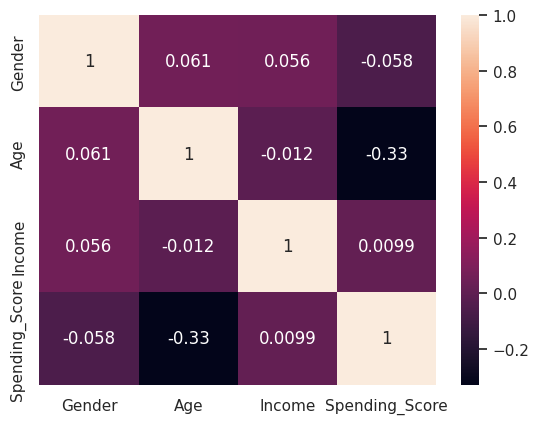

In [166]:
sns.heatmap(store_data.corr(),annot=True)

<ipython-input-167-60f22e1ca27e>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(store_data['Spending_Score'])


<Axes: xlabel='Spending_Score', ylabel='Density'>

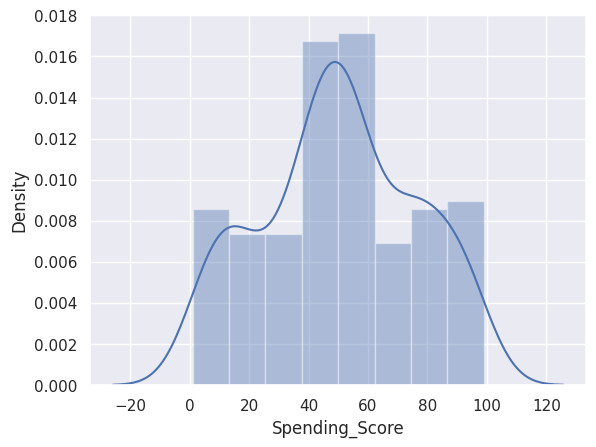

In [167]:
sns.distplot(store_data['Spending_Score'])

Spending Score is maximum from 40 to 60

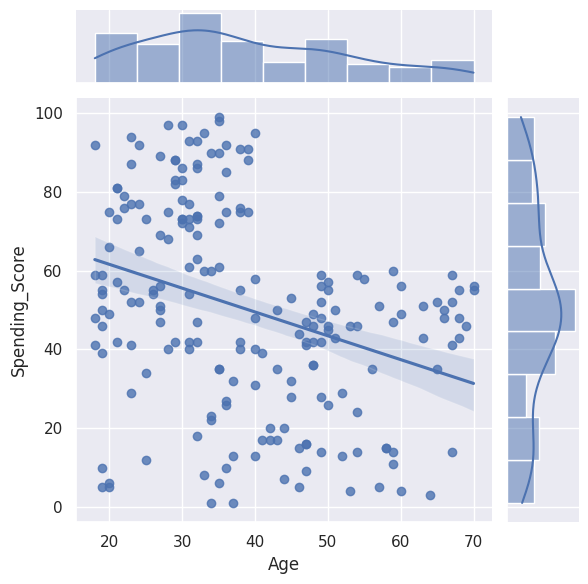

In [168]:
sns.jointplot(x='Age',y='Spending_Score',data=store_data,kind='reg')

<ipython-input-169-f2ba22f338d0>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Gender',y='Spending_Score',data=store_data,palette='rainbow')


<Axes: xlabel='Gender', ylabel='Spending_Score'>

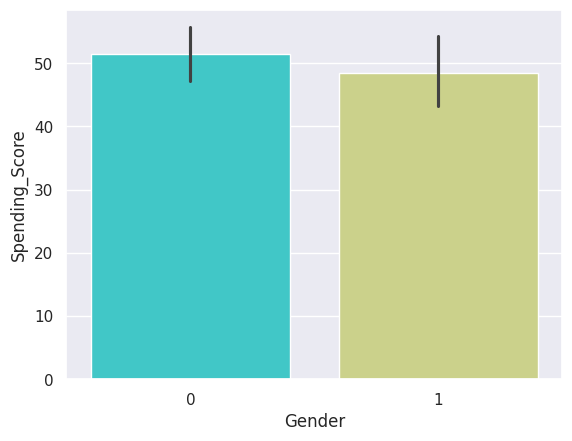

In [169]:
sns.barplot(x='Gender',y='Spending_Score',data=store_data,palette='rainbow')

Female spending score more than Male

<Axes: xlabel='Gender', ylabel='Income'>

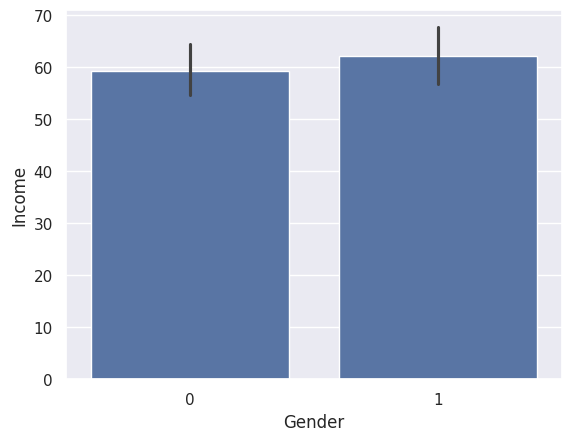

In [170]:
sns.barplot(x='Gender',y='Income',data=store_data)

Male's Income is more than Female's Income

# CHOOSING ONLY INCOME AND SPENDING SCORE FOR CLUSTERING




In [171]:
x=store_data.iloc[:,[2,3]].values

In [172]:
print(x)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

Finding WCSS (Within cluster Sum of Squares) values

To find the number of clusters

In [173]:
wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
  kmeans.fit(x)

  wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

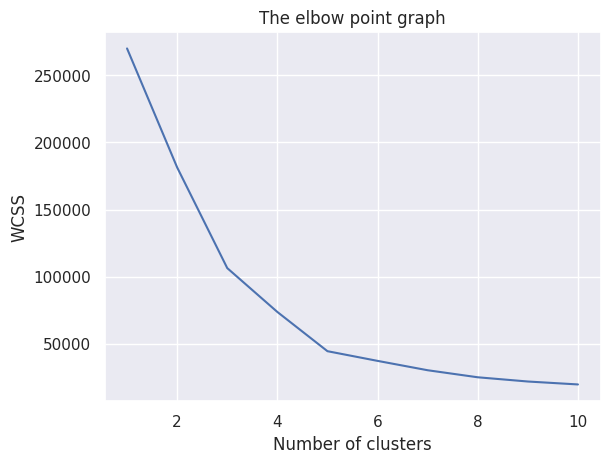

In [174]:
#plot an elbow point graph
sns.set()
plt.plot(range(1,11),wcss)
plt.title("The elbow point graph")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

Optimal Number of Clusters= 5

Training and testing model

In [179]:
#loading the Kmeans model
kmeans=KMeans(n_clusters=5,init='k-means++',random_state=0)

y=kmeans.fit_predict(x)

print(y)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


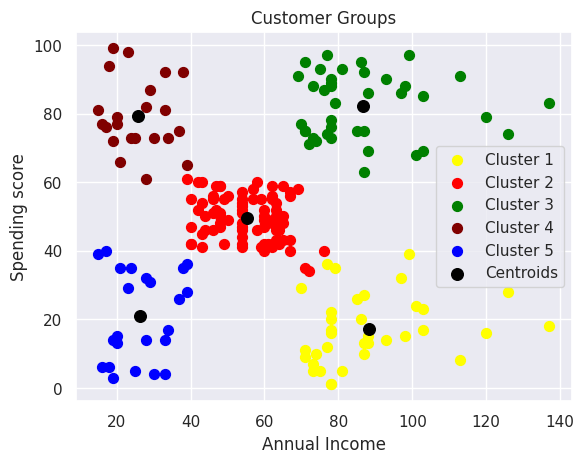

In [188]:
#plotting the clusters and centroids

plt.scatter(x[y==0,0],x[y==0,1],s=50,c="yellow",label="Cluster 1")
plt.scatter(x[y==1,0],x[y==1,1],s=50,c="red",label="Cluster 2")
plt.scatter(x[y==2,0],x[y==2,1],s=50,c="green",label="Cluster 3")
plt.scatter(x[y==3,0],x[y==3,1],s=50,c="maroon",label="Cluster 4")
plt.scatter(x[y==4,0],x[y==4,1],s=50,c="blue",label="Cluster 5")

#plotting the centroids of the cluster
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=70,c="black",label="Centroids")
plt.title("Customer Groups")
plt.xlabel("Annual Income")
plt.ylabel("Spending score")
plt.legend()
plt.show()

The final outcome of this project is by clustering the data I can find that the business can be increased by offering the required discount to those groups who are in need of it and by gaurentee others with the membership cards of the mall to increase the sales of the mall